# Algorithmic Trading

## Introduction

 [Document](http://www.xavierdupre.fr/site2013/documents/reports/finance_autostrat.pdf)

### Definitions 
Trading is the speculative purchase and sale of financial instruments (stocks, bonds, futures contracts, options, currencies, etc.) with the intention of profiting off a change in price. 


Algorithmic trading is the process of using computers programmed to follow a defined set of instructions for placing a trade in order to generate profits at a speed and frequency that is impossible for a human trader.


Apart from profit opportunities for the trader, algo-trading makes markets more liquid and makes trading more systematic by ruling out emotional human impacts on trading activities.

### Problematics

Can we earn money with a "Mean reversing" algorithm ?


### Mean Reversing

intro : http://www.investopedia.com/articles/technical/102201.asp

bollinger band definition and role : http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_band_width

### Sources

Mean reversing principle : https://marketfy.com/content/74202-how-to-trade-mean-reversion-setups

Bollingers band calculation : https://www.packtpub.com/sites/default/files/5306OS-Chapter-3-Get-into-Terms-with-Commonly-Used-Functions.pdf

Testing site : https://www.quantopian.com



## Dataset

In [3]:
# Reading from a file
with open("data.txt", "r") as f:
    data = f.readlines()
    for line in data:
        print(line)

ticker	label	date	open	high	low	close	volume	currency

FR0000120404	ACCOR	17/09/2015	42,755	43,530	42,565	43,405	697301	EUR

FR0000120404	ACCOR	18/09/2015	43,100	43,165	42,270	42,830	1282376	EUR

FR0000120404	ACCOR	21/09/2015	42,950	43,805	42,905	43,395	952046	EUR

FR0000120404	ACCOR	22/09/2015	43,600	43,690	41,420	41,570	1439463	EUR

FR0000120404	ACCOR	23/09/2015	41,545	42,210	40,765	41,890	1131938	EUR

FR0000120404	ACCOR	24/09/2015	41,885	42,430	40,660	40,835	1595345	EUR

FR0000120404	ACCOR	25/09/2015	41,375	42,580	41,375	42,455	1023001	EUR

FR0000120404	ACCOR	28/09/2015	42,215	42,520	40,830	40,930	1794653	EUR

FR0000120404	ACCOR	29/09/2015	40,410	41,060	39,945	40,100	1253655	EUR

FR0000120404	ACCOR	30/09/2015	40,800	42,125	40,660	41,760	1208913	EUR

FR0000120404	ACCOR	01/10/2015	42,480	43,790	41,675	42,005	1829057	EUR

FR0000120404	ACCOR	02/10/2015	42,415	42,630	41,125	42,015	1065077	EUR

FR0000120404	ACCOR	05/10/2015	42,820	44,265	42,820	44,255	1240955	EUR

FR0000120404	ACCOR	06/10

In [4]:
#todo : mean value over a period and not on the full dataset
meanValues=[]
bolingers = [[],[]]
testArray=[90.70,92.90,92.98,91.80,92.66,92.68,92.30,92.77,92.54,92.95,93.20,91.07,89.83,89.74,90.40,90.74,88.02,88.09,88.84,90.78,90.54,91.39]
testDeviationArray = [53.73,53.87,53.85,53.88,54.08,54.14,54.50,54.30,54.40,54.16]
meanRevertingProcessValues(testDeviationArray,meanValues,bolingers)

IndexError: list index out of range

In [121]:
def bandValueHandling(bandPercentageArray,bandValue):
    maxBandValue = np.amax(bandPercentageArray)
    minBandValue = np.amin(bandPercentageArray)
    print(maxBandValue,minBandValue)
    #print(bandValue,maxBandValue[2],minBandValue[2],bollingerArray))
    if(bandValue > maxBandValue):
        print("break,sell?",bandValue)
    elif(bandValue < minBandValue):
        print("break,bye?")
    
    
def bolingerBands(arrayValues,arraySize,bolingers,meanValue,period):
    if(False):
        print(arraySize,arrayValues)
    else:
        standardDeviationValue = manualStandarDeviation(arrayValues,arraySize,meanValue)
        #print(standardDeviationValue)
        #standardDeviationValue = np.std(arrayValues,ddof=0)
        upperBand = meanValue + 2*standardDeviationValue
        lowerBand = meanValue - 2*standardDeviationValue
        bandValue = (upperBand - lowerBand)/meanValue*100
        bolingers[0].append(upperBand)
        bolingers[1].append(lowerBand)
        if(len(bolingers[0]) > 1):
            # > 1  to avoid 0 as the lower value
            bandPercentageArray.append(bandValue)
            currentBolingerValue = getRightSizedArray(bandPercentageArray,len(bandPercentageArray),period)
            bandValueHandling(currentBolingerValue,bandValue)
        #print(bandValue)
     
    
def manualStandarDeviation(arrayValues,arraySize,meanValue):
    sum = 0
    variance = 0
    deviations = []
    standardDeviationValue = 0   
    for value in arrayValues:
        #print(value,meanValue)
        deviation = np.square(value - meanValue)
        deviations.append(deviation)
        sum += deviation
    if(arraySize >= 2): 
        variance = sum/(arraySize - 1)
    standardDeviationValue = np.sqrt(variance)
    return standardDeviationValue

def movingAverage(arrayValues,arraySize,meanValues,period):
    #todo: find better method to calculate mean over an array of specific size
    meanValue = np.mean(arrayValues)
    meanValues.append(meanValue)
    return meanValue
    
def getRightSizedArray(arrayValues,arraySize,period):
    tmpArrayValues = []
    if(arraySize >= period ):
        startValue = arraySize - period
        tmpArrayValues = arrayValues[startValue:arraySize]
        print("arrayChanged")
        return tmpArrayValues
    else:
        return arrayValues
def meanRevertingProcessValues(arrayValues,meanValues,bolingers,bandPercentageArray):
    arraySize = len(arrayValues)
    period = 40
    tmpArrayValues = getRightSizedArray(arrayValues,arraySize,period)
    meanValue = movingAverage(tmpArrayValues,arraySize,meanValues,period)
    bolingerBands(tmpArrayValues,arraySize,bolingers,meanValue,period)
        

In [123]:
import pandas as pd
import numpy as np
import datetime

# Format as Tab
with open("data.txt", "r") as f:
    data = f.readlines()
    dates =[]
    openValues =[]
    closeValues = []
    meanValues = []
    bandPercentageArray = []
    bolingers = [[],[],[]]
    #print(bolingers)
    for line in data:
        #only total stocks
        if "TOTAL" in line:
            row = line.strip('\n').split('\t')
            sDate = row[2].split('/')
            #focus on date and close market value
            date = datetime.date(int(sDate[2]),int(sDate[1]),int(sDate[0]))
            dates.append(date)
            closeValue = float(row[6].replace(',','.'))
            closeValues.append(closeValue)
            openValue = float(row[3].replace(',','.'))
            openValues.append(openValue)
            meanRevertingProcessValues(openValues,meanValues,bolingers,bandPercentageArray)
    x = pd.Series(index=dates, data=openValues)
    dataSet = {'date': dates, 
        'open': openValues,'mean': meanValues,'bolingerUp':bolingers[0],'bolingerDown':bolingers[1]}
    
    frame = pd.DataFrame(dataSet,index=dates,columns=['open','mean','bolingerUp','bolingerDown'])

4.76786687297 4.76786687297
8.95914596055 4.76786687297
8.95914596055 4.76786687297
9.783136582 4.76786687297
9.783136582 4.76786687297
9.783136582 4.76786687297
9.783136582 4.76786687297
11.397638556 4.76786687297
11.397638556 4.76786687297
11.397638556 4.76786687297
11.397638556 4.76786687297
11.397638556 4.76786687297
12.3956581377 4.76786687297
15.7084393155 4.76786687297
18.4346625645 4.76786687297
20.8166642633 4.76786687297
21.7806465179 4.76786687297
22.1459694554 4.76786687297
22.1459694554 4.76786687297
22.5622080978 4.76786687297
23.0155119485 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.2642307057 4.76786687297
23.26

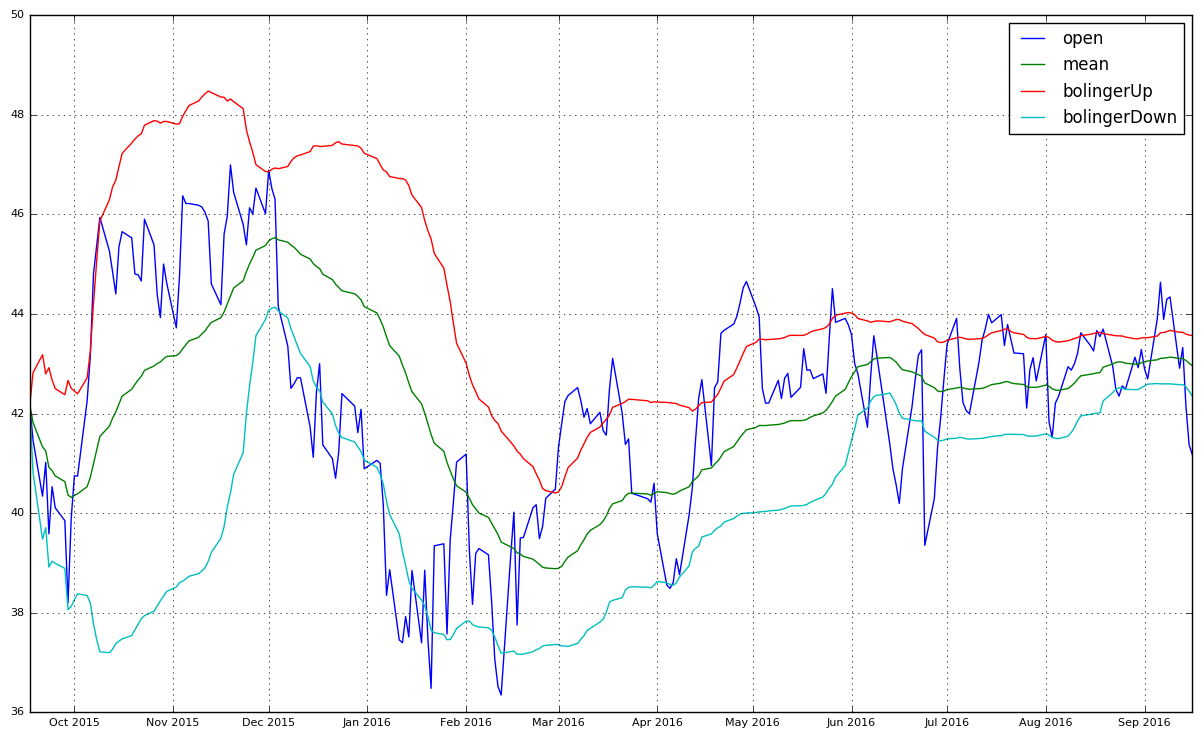

In [63]:
import matplotlib.pyplot as plt
import pylab
#mandatory line to plot in jupyter notebook
%matplotlib inline 
open_mean = 0
#plot size adjustement 
pylab.rcParams['figure.figsize'] = (15, 9)
frame.plot(fontsize=8,grid = True)


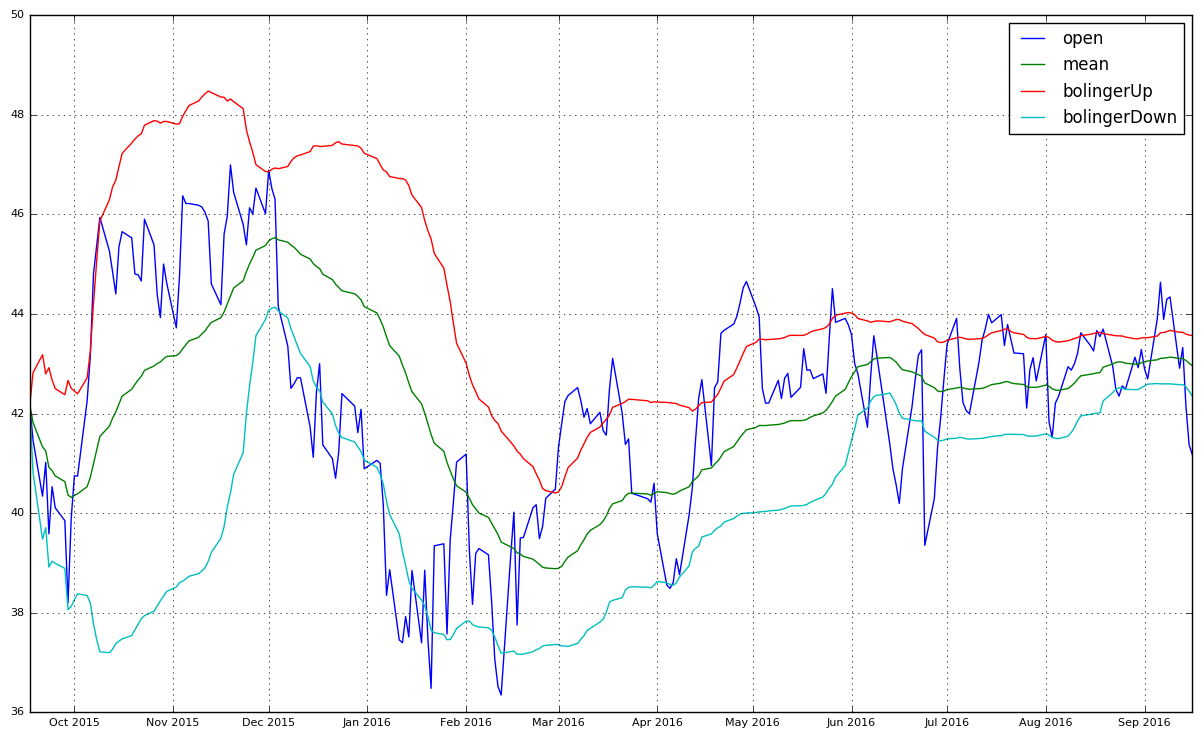

In [8]:
import matplotlib.pyplot as plt
import pylab
#mandatory line to plot in jupyter notebook
%matplotlib inline 
open_mean = 0
#plot size adjustement 
pylab.rcParams['figure.figsize'] = (15, 9)
frame.plot(fontsize=8,grid = True)


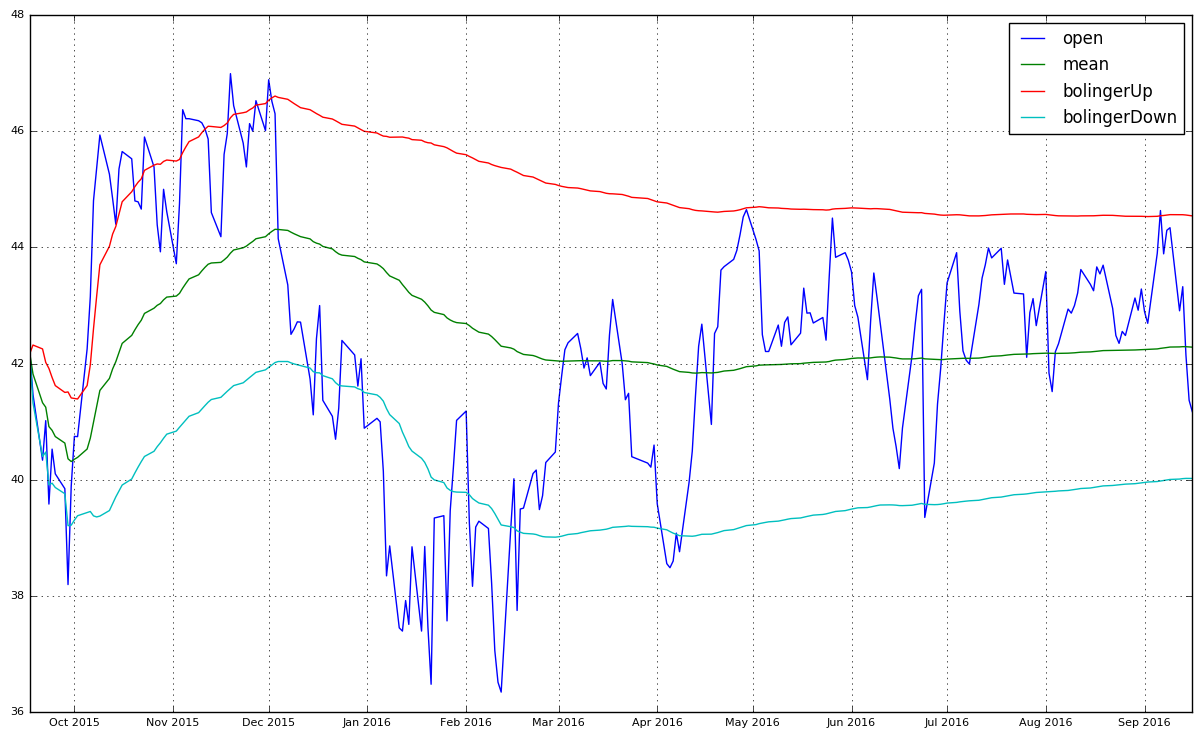

In [7]:
import matplotlib.pyplot as plt
import pylab
#mandatory line to plot in jupyter notebook
%matplotlib inline 
open_mean = 0
#plot size adjustement 
pylab.rcParams['figure.figsize'] = (15, 9)
frame.plot(fontsize=8,grid = True)
